In [ ]:
import os
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

# Juntando os datasets

In [374]:

df1 = pd.read_csv(os.path.join('..','data', 'features.csv'), parse_dates=True)
df2 = pd.read_csv(os.path.join('..','data', 'stores.csv'), parse_dates=True)
df3 = pd.read_csv(os.path.join('..','data', 'train.csv'), parse_dates=True)

In [375]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [376]:
df2.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [377]:
df3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [378]:
df4= df1.merge(df2, on='Store', how='left')

In [379]:
df4.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [380]:
df=df4.merge(df3[['Store','Dept','Date','Weekly_Sales']], on=['Store','Date'], how='inner')

In [381]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [382]:
df = df.sort_values(by='Date')


In [383]:
df['Store'].value_counts().head()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
Name: count, dtype: int64

In [384]:
mask=df['IsHoliday']==False
df.loc[mask,'IsHoliday']=0
df.loc[~mask,'IsHoliday']=1

C:\Users\angel\AppData\Local\Temp\ipykernel_23080\1779836956.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[mask,'IsHoliday']=0


In [385]:
df=df.query('Store==13')
df=df.drop(columns=['Store','Type','Size','Dept'],axis=0).fillna(0)
df_group=df.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

In [386]:
df0=df_group.merge(df.drop(columns=['Weekly_Sales']), on="Date", how='left').drop_duplicates()
df0['Date'] = pd.to_datetime(df0['Date'])
df0 = df0.set_index('Date')

In [387]:
df0

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1967220.53,31.53,2.666,0.00,0.00,0.00,0.00,0.00,126.442065,8.316,0
2010-02-12,2030933.46,33.16,2.671,0.00,0.00,0.00,0.00,0.00,126.496258,8.316,1
2010-02-19,1970274.64,35.70,2.654,0.00,0.00,0.00,0.00,0.00,126.526286,8.316,0
2010-02-26,1817850.32,29.98,2.667,0.00,0.00,0.00,0.00,0.00,126.552286,8.316,0
2010-03-05,1939980.43,40.65,2.681,0.00,0.00,0.00,0.00,0.00,126.578286,8.316,0
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1927664.11,64.80,3.821,5197.64,63.10,2.60,3022.73,9779.77,131.043000,5.765,0
2012-10-05,2041918.74,61.79,3.815,6607.14,0.00,50.60,3943.91,7700.91,131.075667,5.621,0
2012-10-12,1999079.44,55.10,3.797,1927.15,0.00,9.72,518.97,11269.24,131.108333,5.621,0


## Split

In [410]:
split=int(0.8 * len(df0))
df1=df0[:split]
test=df0[split:]

In [389]:
print(df1.shape)
print(test.shape)

(114, 11)
(29, 11)


In [411]:
test=test[['Weekly_Sales','IsHoliday']]
test.to_csv('../data/test.csv')

In [391]:
df1[['Weekly_Sales']].describe()

,Weekly_Sales
count,1.140000e+02
mean,1.993550e+06
std,2.944145e+05
min,1.633663e+06
25%,1.861752e+06
50%,1.933912e+06
75%,2.017817e+06
max,3.595903e+06


In [392]:
df1.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1967220.53,31.53,2.666,0.0,0.0,0.0,0.0,0.0,126.442065,8.316,0
2010-02-12,2030933.46,33.16,2.671,0.0,0.0,0.0,0.0,0.0,126.496258,8.316,1
2010-02-19,1970274.64,35.70,2.654,0.0,0.0,0.0,0.0,0.0,126.526286,8.316,0
2010-02-26,1817850.32,29.98,2.667,0.0,0.0,0.0,0.0,0.0,126.552286,8.316,0
2010-03-05,1939980.43,40.65,2.681,0.0,0.0,0.0,0.0,0.0,126.578286,8.316,0


# Removendo variaveis exógenas para primeira analise

In [393]:
df2=df1[['Weekly_Sales']]

In [394]:
df2.head()

,Weekly_Sales
Date,
2010-02-05,1967220.53
2010-02-12,2030933.46
2010-02-19,1970274.64
2010-02-26,1817850.32
2010-03-05,1939980.43


## Preparação do treino

<Axes: xlabel='Date'>

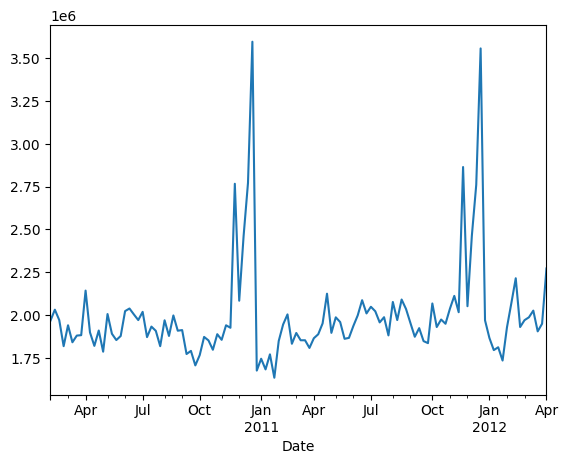

In [395]:
df2['Weekly_Sales'].plot()

<Axes: xlabel='Date'>

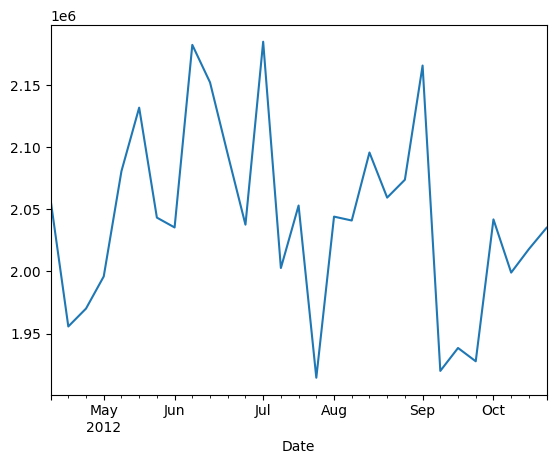

In [396]:
test['Weekly_Sales'].plot()

## Decompondo

In [397]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 800x600 with 0 Axes>

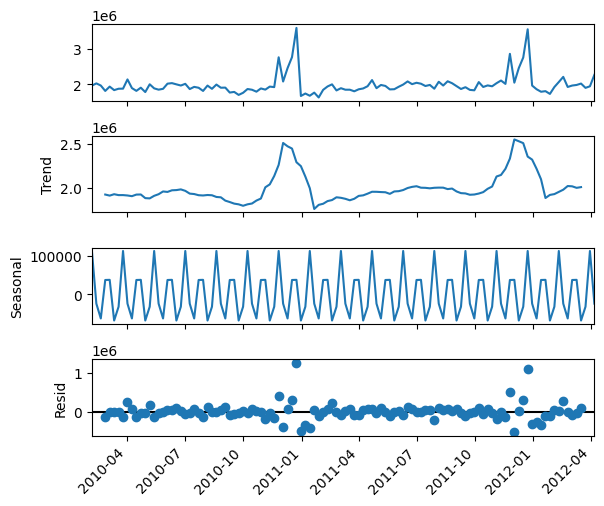

In [398]:
resultado = seasonal_decompose(df2, period=7)

fig = plt.figure(figsize=(8, 6))  
fig = resultado.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

## Avaliando estacionariedade

In [399]:
from statsmodels.tsa.stattools import adfuller

In [400]:
resultado = adfuller(df2)
print(f'Teste ADF:{resultado[0]}')
print(f'p-valor:{resultado[1]}')

Teste ADF:-4.9157704686760235
p-valor:3.24913764644469e-05


p-valor abaixo de 0.05, demontrando estacionaridade. 

## Avaliando ACF e PACF 

In [401]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

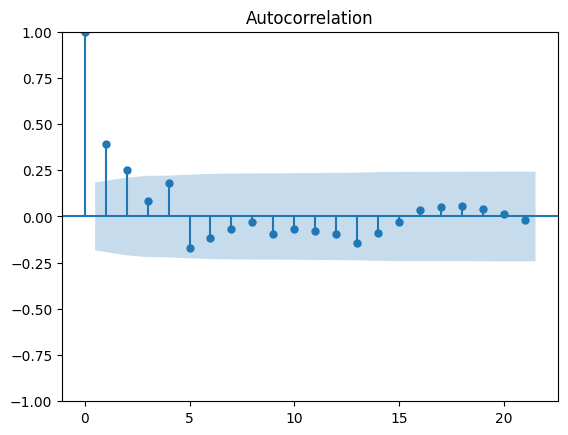

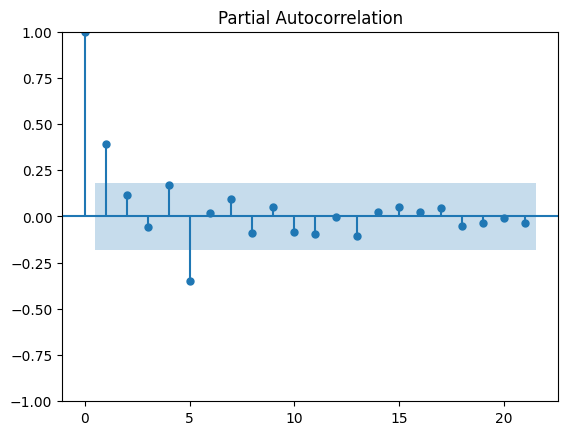

In [402]:
plot_acf(df2)  
plot_pacf(df2)
plt.show()

PACF aparenta: p=1 ou 5;

d=0; serie é estacionaria

ACF aparenta: q=2